<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

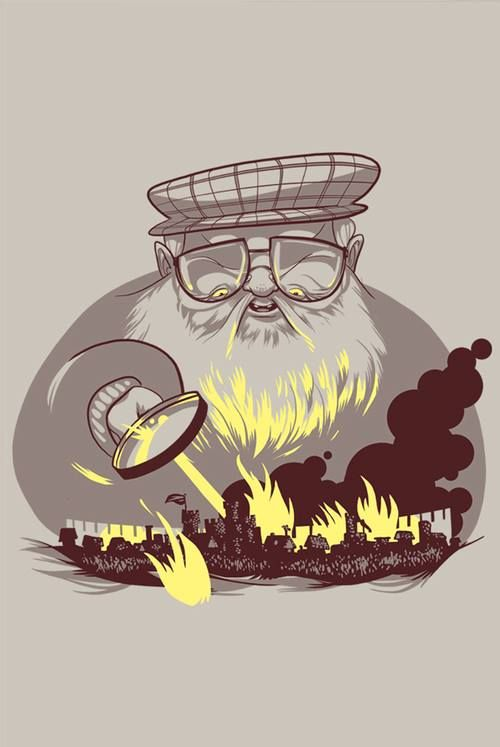

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [ ]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 66.5MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 5.51MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [ ]:
# Импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [ ]:
# Загружаем датасет из файла
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

<BarContainer object of 25 artists>

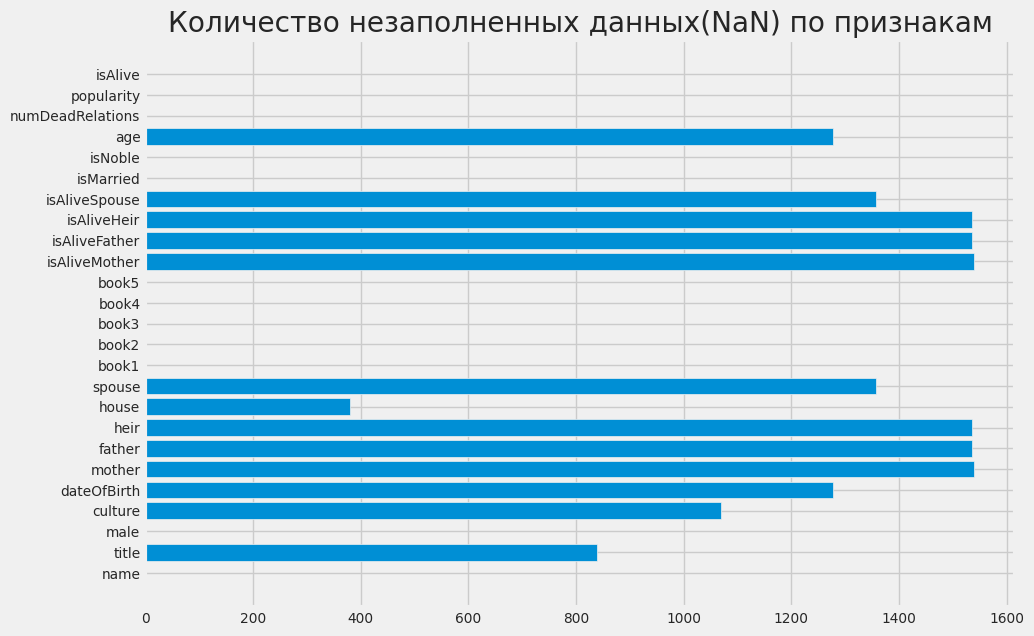

In [ ]:
# Определяем количество незаполненных данных(NaN) по колонкам
nansum = data.isna().sum(axis=0)
# Визуализиуем на гистограмме
plt.figure(figsize=(10,7))
plt.title("Количество незаполненных данных(NaN) по признакам")
plt.barh(nansum.index, nansum.values)

In [ ]:
# Удаляем признаки, которые слишком мало заполнены
data.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)

In [ ]:
# Обрабатывааем колонку age (количественный признак), ищем медиану
medianAge = np.quantile(data['age'].dropna().values, q=0.5)
# Заменяем значение NaN на medianAge
data.loc[(data.age.isna()), 'age'] = medianAge

# Обрабатывааем колонку dateOfBirth (количественный признак), ищем медиану
medianDOB = np.quantile(data['dateOfBirth'].dropna().values, q=0.5)
# Заменяем значение NaN на medianDOB
data.loc[(data.dateOfBirth.isna()), 'dateOfBirth'] = medianDOB

# Создаем колонку shouldBeDead
data['shouldBeDead'] = np.where(data['dateOfBirth'] + data['age'] < 305, 1, 0)

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [ ]:
# Создаем признак isPopular
# 0: popularity < 0.5, 1: popularity >= 0.5, записываем в новую колонку isPopular
data['isPopular'] = np.where(data.popularity>=0.5, 1, 0)

In [ ]:
# Создаем признак boolDeadRelations
# 0: numDeadRelations = 0, 1: numDeadRelations > 0, записываем в новую колонку boolDeadRelations
data['boolDeadRelations'] = np.where(data.numDeadRelations>0, 1, 0)

In [ ]:
# Упрощаем признак culture с помощью словаря
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}
for cult_key, cult_value in cult.items():
  data.loc[data.culture.str.lower().isin(cult_value), 'culture'] = cult_key

In [ ]:
# Создадим еще один новый признак - noInLateBooks:
# 1 - если персонаж не присутствует в последних двух книгах
data['noInLateBooks'] = np.where((data['book4'] == 0) & (data['book5'] == 0), 1, 0)

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

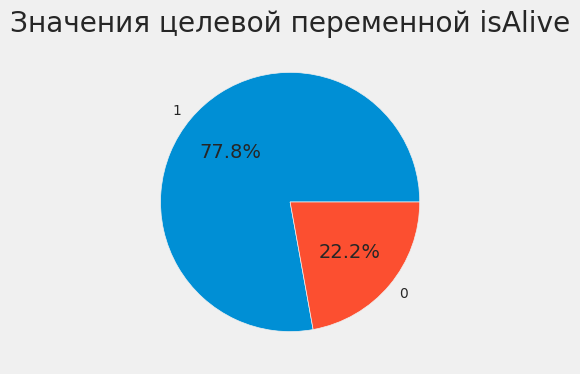

In [ ]:
# Анализируем целевую переменную isAlive (категориальный признак)
aliveData = data['isAlive'].value_counts()
labels = aliveData.index
plt.figure(figsize=(6, 4))
plt.pie(aliveData.values, labels=labels, autopct='%1.1f%%')
plt.title('Значения целевой переменной isAlive')
plt.show()

In [ ]:
# Рассчитаем средний процент выживших
survival_rate = data['isAlive'].mean() * 100
print(f"Средний процент выживших: {survival_rate:.2f}%")

Средний процент выживших: 77.84%


**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [ ]:
# Обрабатываем категориальный признак title
# Слишком много мелких title, оставляем часто встречающиеся, остальные сохраняем как Others
other_titles = data['title'].value_counts()[50:]
data.loc[(data.title.isin(other_titles.keys())), 'title'] = 'Other'
data.loc[(data.title.isna()), 'title'] = 'Other'

# Сформируем новый признак percentAliveInTitle - процент выживших для title
# Группируем по колонке 'title' и считаем процент тех, у кого isAlive = 1
total_in_title = data.groupby('title')['isAlive'].count()
alive_in_title = data.groupby('title')['isAlive'].sum()
percent_alive = (alive_in_title / total_in_title) * 100

# Добавляем колонку с процентом живых для каждого title
data['percentAliveInTitle'] = data['title'].map(percent_alive)
data.loc[(data.percentAliveInTitle.isna()), 'percentAliveInTitle'] = survival_rate

# Удаляем title
data.drop(columns=['title'], inplace = True)

In [ ]:
# Обрабатываем категориальный признак house
# Функция для заполнения колонки 'house'
def fill_house(row):
    # Если колонка 'house' пуста
    if pd.isna(row['house']):
        # Разделяем name на части (имя и фамилия)
        parts = row['name'].split()
        # Если есть фамилия, записываем 'House ' + фамилия
        if len(parts) > 1:
            return 'House ' + parts[-1]
        else:
            return 'Other'
    return row['house']

# Применяем функцию к каждой строке
data['house'] = data.apply(fill_house, axis=1)
other_houses = data['house'].value_counts()[30:]
data.loc[(data.house.isin(other_houses.keys())), 'house'] = 'Other'

# Группируем по колонке 'house' и считаем процент тех, у кого isAlive = 1
total_in_house = data.groupby('house')['isAlive'].count()
alive_in_house = data.groupby('house')['isAlive'].sum()
percent_alive = (alive_in_house / total_in_house) * 100

# Добавляем колонку с процентом живых для каждого house
data['percentAliveInHouse'] = data['house'].map(percent_alive)

# Удаляем house
data.drop(columns=['house'], inplace = True)

data['percentAliveInHouse']

,percentAliveInHouse
S.No,
1,22.222222
2,89.010989
3,100.000000
4,63.636364
5,82.824025
...,...
1553,82.824025
1554,82.824025
1555,42.857143


In [ ]:
# Обработаем признак name
# Создадим признак, содержащий длину имени
data['namelen'] = data['name'].apply(len)
data.drop(columns=['name'], inplace = True)

In [ ]:
# Остался один необработанный категориальный признак - culture
# Обрабатываем с помощью LabelEncoder
from sklearn.preprocessing import LabelEncoder
label_encoding = LabelEncoder()
data['cultureNum'] = label_encoding.fit_transform(data['culture'])

# Удаляем culture
data.drop(columns=['culture'], inplace = True)

In [ ]:
# Проверяем, что не осталось NaN в наших данных
data.isna().sum(axis=0)

,0
male,0
dateOfBirth,0
book1,0
book2,0
book3,0
book4,0
book5,0
isMarried,0
isNoble,0
age,0


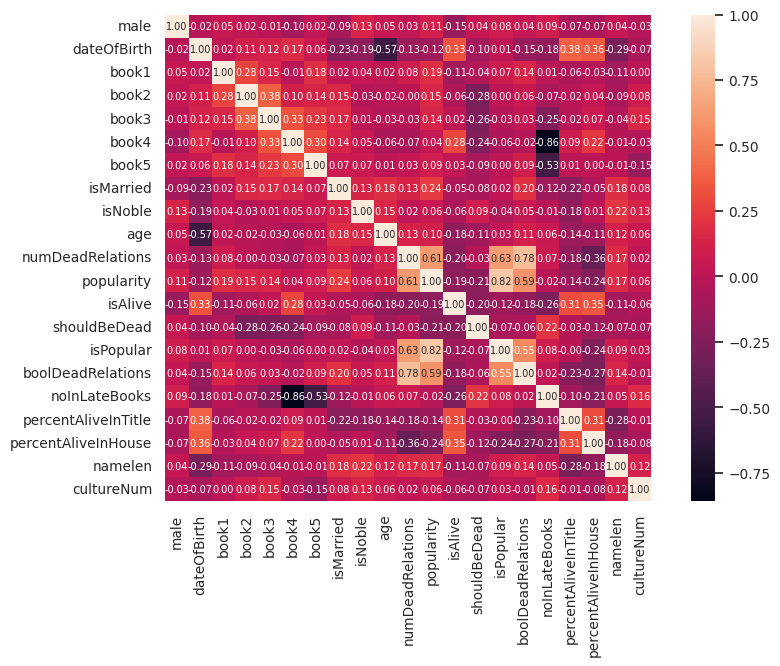

In [ ]:
# Строим heatmap корреляции всех признаков
corrmat = data.corr()
cm = np.corrcoef(data.values.T)
sns.set(font_scale=0.9)
plt.figure(figsize=(9, 8))
plt.title("Корреляция между признаками")
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,fmt='.2f',annot_kws={'size':7}, yticklabels=data.columns.values, xticklabels=data.columns.values)
plt.show()

In [ ]:
data.drop(columns=['isNoble'], inplace = True) # удаляем как бесполезный
data.drop(columns=['isPopular'], inplace = True) # удаляем из-за корреляции
data.drop(columns=['boolDeadRelations'], inplace = True) # удаляем из-за корреляции
# видим еще корреляцию, но пока не удаляем до дальнейшего анализа

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

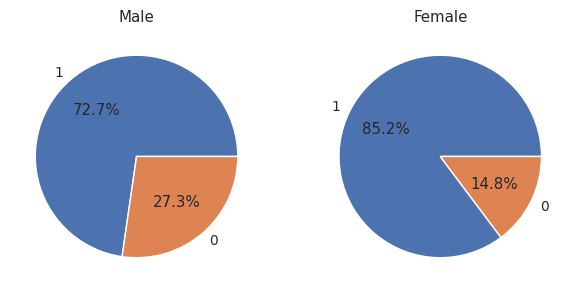

In [ ]:
# На heatmap мы видим влияние признаков на isAlive, поэтому дополнительно
# посмотрим только некоторые признаки
data1 = data.loc[(data.male == 1)]['isAlive'].value_counts()
data2 = data.loc[(data.male == 0)]['isAlive'].value_counts()
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title("Male")
ax2.set_title("Female")
plt.show()

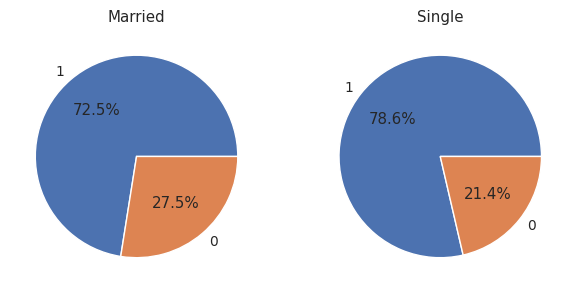

In [ ]:
data1 = data.loc[(data.isMarried == 1)]['isAlive'].value_counts()
data2 = data.loc[(data.isMarried == 0)]['isAlive'].value_counts()
fig, [ax1, ax2] = plt.subplots(1,2)
ax1.pie(data1.values, labels=data1.index, autopct='%1.1f%%')
ax2.pie(data2.values, labels=data2.index, autopct='%1.1f%%')
ax1.set_title("Married")
ax2.set_title("Single")
plt.show()

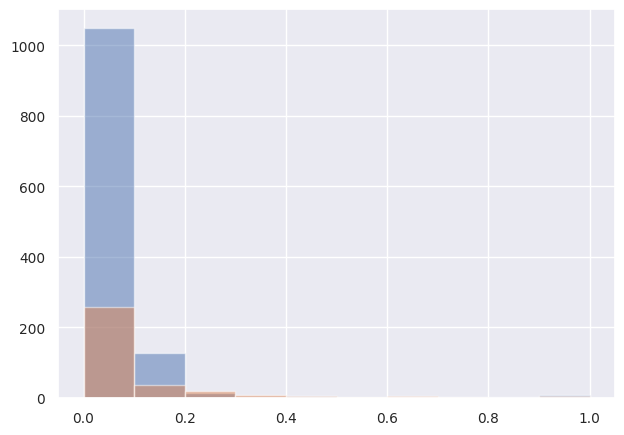

In [ ]:
plt.hist(data.loc[(data.isAlive==1)]['popularity'], alpha=.5)
plt.hist(data.loc[(data.isAlive==0)]['popularity'], alpha=.5)
plt.show()

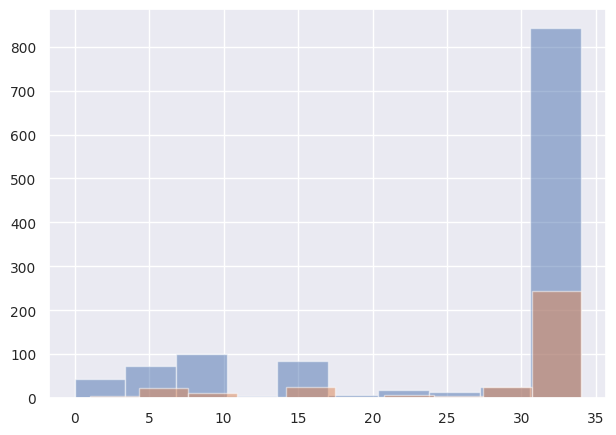

In [ ]:
plt.hist(data.loc[(data.isAlive==1)]['cultureNum'], alpha=.5)
plt.hist(data.loc[(data.isAlive==0)]['cultureNum'], alpha=.5)
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [ ]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [ ]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1, max_iter=1000)

# Нормализация данных (для логистической регрессии это нужно)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Шаг 2. обучение модели
logistic_regression.fit(X_scaled, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test_scaled)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8494


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Пробуем делать предсказания на разных моделях

# AdaBoostClassifier
model = AdaBoostClassifier(algorithm='SAMME')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# сразу вычисляем accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy AdaBoostClassifier: %.4f" % accuracy)

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RandomForestClassifier: %.4f" % accuracy)

# GaussianProcessClassifier
model = GaussianProcessClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianProcessClassifier: %.4f" % accuracy)

# GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy GaussianNB: %.4f" % accuracy)

# KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy KNeighborsClassifier: %.4f" % accuracy)

# SVC
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy SVC: %.4f" % accuracy)

# DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DecisionTreeClassifier: %.4f" % accuracy)


Accuracy AdaBoostClassifier: 0.8718
Accuracy RandomForestClassifier: 0.9006
Accuracy GaussianProcessClassifier: 0.8397
Accuracy GaussianNB: 0.8333
Accuracy KNeighborsClassifier: 0.8365
Accuracy SVC: 0.8333
Accuracy DecisionTreeClassifier: 0.8397


In [ ]:
# Попробуем еще GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8974


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

In [ ]:
# Согласно полученным выше accuracy выберем две самые самые многообещающие модели:
#   RandomForestClassifier и GradientBoostingClassifier
# Дальше будем работать с ними и попробуем улучшить результат

                     RandomForest  GradientBoosting
Features                                           
male                     0.125022          0.012422
dateOfBirth              0.431153          1.000000
book1                    0.106597          0.075728
book2                    0.122158          0.039779
book3                    0.111944          0.015182
book4                    0.198268          0.370799
book5                    0.076670          0.003629
isMarried                0.054568          0.054790
age                      0.178197          0.173983
numDeadRelations         0.081027          0.043489
popularity               1.000000          0.744142
shouldBeDead             0.120089          0.425012
noInLateBooks            0.130684          0.143701
percentAliveInTitle      0.389861          0.281254
percentAliveInHouse      0.492151          0.594854
namelen                  0.685454          0.129014
cultureNum               0.282191          0.135921


<Figure size 1000x600 with 0 Axes>

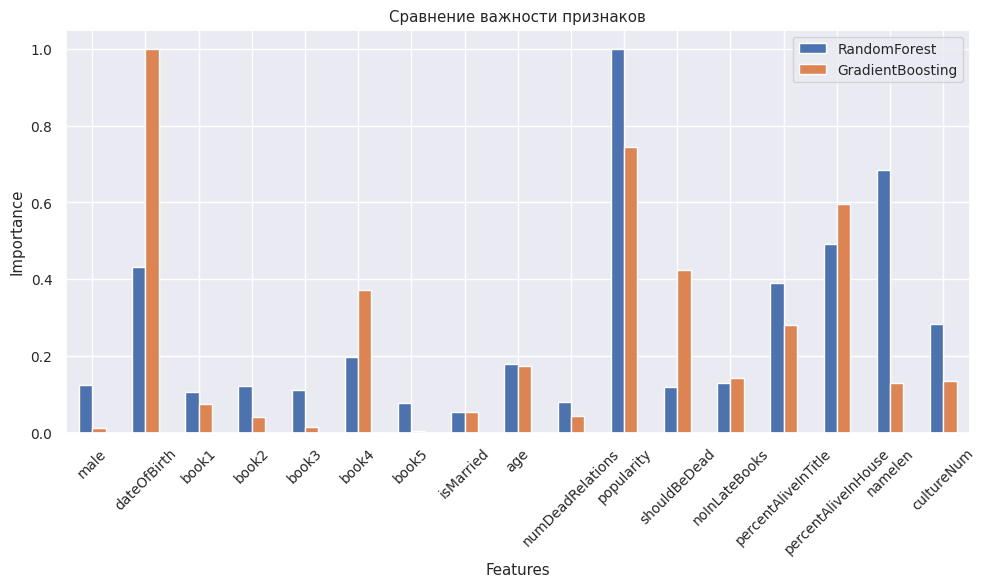

In [ ]:
# Проанализируем важность признаков для каждой из моделей

# Важность признаков RandomForest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
rf_importances = rf_model.feature_importances_

# Важность признаков GradientBoosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X, y)
gb_importances = gb_model.feature_importances_

# Создание DataFrame для удобного сравнения важностей признаков
feature_importance_df = pd.DataFrame({
    'Features': X.columns,
    'RandomForest': rf_importances,
    'GradientBoosting': gb_importances
})

# Нормализация значений для сравнения
feature_importance_df.set_index('Features', inplace=True)
feature_importance_df = feature_importance_df / feature_importance_df.max()

print(feature_importance_df)

# Визуализация важности признаков с разных методов
plt.figure(figsize=(10, 6))
feature_importance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Сравнение важности признаков')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Попробуем кросс-валидацию
from sklearn.model_selection import cross_val_score

# RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Применение кросс-валидации с 10 фолдами
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='accuracy')

# Вывод результатов кросс-валидации
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation accuracy: {cv_scores.mean():.4f}')

Cross-validation scores: [0.87820513 0.85897436 0.86538462 0.88461538 0.85897436 0.83333333
 0.85897436 0.88387097 0.89677419 0.85806452]
Mean cross-validation accuracy: 0.8677


In [ ]:
# Попробуем сделать стек из двух моделей
from sklearn.ensemble import StackingClassifier

# Базовые модели (градиентный бустинг и случайный лес)
estimators = [
    ('gb', GradientBoostingClassifier()), # Градиентный бустинг
    ('rf', rf_model) # Случайный лес
]

# Модель для стеккинга
stacking_model = StackingClassifier(
    estimators=estimators,                        # Базовые модели
    final_estimator=GradientBoostingClassifier(), # Метамодель
    cv=10                                         # Кросс-валидация
)
# Обучение модели стеккинга
stacking_model.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = stacking_model.predict(X_test)

# Оценка точности (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8878


In [ ]:
# Для подбора лучших параметров модели RandomForestClassifier используем RandomizedSearchCV
#   (GridSearchCV слишком долго работает)
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()

# Параметры для подбора с RandomizedSearchCV
random_grid = {
    'n_estimators': np.arange(100, 1000, 100),
    'max_depth': np.arange(10, 110, 10),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Настройка RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=random_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Запуск поиска
random_search.fit(X, y)

# Вывод лучших параметров и точности
print("Лучшие параметры:", random_search.best_params_)
print("Лучшая точность:", random_search.best_score_)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Лучшие параметры: {'n_estimators': 500, 'min_samples_split': 9, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 80, 'bootstrap': False}
Лучшая точность: 0.8599863962404155


In [ ]:
# Определим оптимальные параметры для GradientBoostingClassifier с помощью RandomizedSearchCV
from scipy.stats import uniform, randint

# Задаём пространство для случайного поиска
param_dist = {
    'n_estimators': randint(100, 300),
    'learning_rate': uniform(0.01, 0.3),
    'max_depth': randint(3, 7),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'subsample': uniform(0.7, 0.3),
    'max_features': ['sqrt', 'log2', None]
}
gb = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gb, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
random_search.fit(X, y)

# Лучшая модель и её параметры
print("Лучшие параметры: ", random_search.best_params_)
print("Лучший результат: ", random_search.best_score_)


Fitting 3 folds for each of 100 candidates, totalling 300 fits
Лучшие параметры:  {'learning_rate': 0.05209994031602197, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 182, 'subsample': 0.9961393153491038}
Лучший результат:  0.8698795180722891


In [ ]:
# Подставим оптимальные параметры, подобранные RandomForestClassifier, и посмотрим, что вышло
rf_model = RandomForestClassifier(n_estimators=500, min_samples_split=9, min_samples_leaf=1, max_features='log2', max_depth=80, bootstrap=False)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy RandomForestClassifier with new params: %.4f" % accuracy)

Accuracy RandomForestClassifier with new params: 0.9006


In [ ]:
# Подготовим тестовый датасет
data = pd.read_csv('/content/game_of_thrones_test.csv', index_col='S.No')
data.drop(columns=['mother', 'father', 'heir', 'spouse', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse'], inplace=True)
data.loc[(data.age.isna()), 'age'] = medianAge
data.loc[(data.dateOfBirth.isna()), 'dateOfBirth'] = medianDOB
data['shouldBeDead'] = np.where(data['dateOfBirth'] + data['age'] < 305, 1, 0)
for cult_key, cult_value in cult.items():
  data.loc[data.culture.str.lower().isin(cult_value), 'culture'] = cult_key
data['noInLateBooks'] = np.where((data['book4'] == 0) & (data['book5'] == 0), 1, 0)
# title
data.loc[(data.title.isin(other_titles.keys())), 'title'] = 'Other'
data.loc[(data.title.isna()), 'title'] = 'Other'
data['percentAliveInTitle'] = data['title'].map(percent_alive)
data.loc[(data.percentAliveInTitle.isna()), 'percentAliveInTitle'] = survival_rate
# house
data['house'] = data.apply(fill_house, axis=1)
data.loc[(data.house.isin(other_houses.keys())), 'house'] = 'Other'
data['percentAliveInHouse'] = data['house'].map(percent_alive)
data['namelen'] = data['name'].apply(len)
data['cultureNum'] = label_encoding.fit_transform(data['culture'])
data.drop(columns=['title', 'house', 'name', 'isNoble', 'culture'], inplace = True)

In [ ]:
# Предскажем искомые значения на выбранной модели
rf_model.fit(X, y)
y_pred = rf_model.predict(data)

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 11.1MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission['isAlive'] = y_pred

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)